In [ ]:
import pandas as pd


data = pd.read_csv("/content/Crop Production data.csv")


print(data.info())


print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB
None
                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  

In [ ]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:

print(data.isnull().sum())


data.dropna(inplace=True)


data['Crop_Year'] = pd.to_datetime(data['Crop_Year'], format='%Y')


print(data['Season'].unique())
print(data['Crop'].unique())

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64
['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ' 'Summer     '
 'Winter     ']
['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Mesta' 'Cowpea(Lobia)' 'Lemon' 'Pome Granet'
 'Sapota

In [ ]:
print(data.isnull().sum())

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64


In [ ]:
data.to_csv('/content/sample_data/crop_analysis_cleaned.csv',index = False)

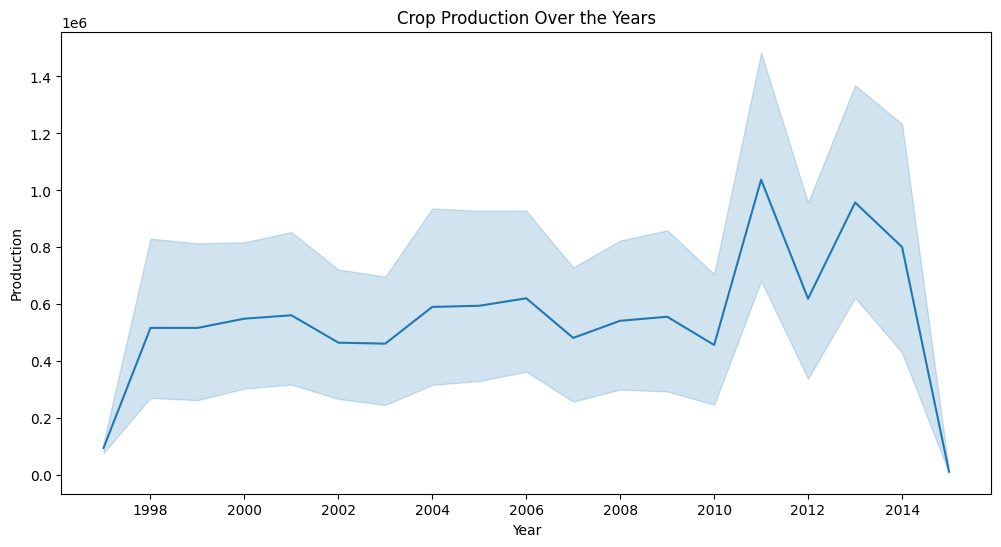

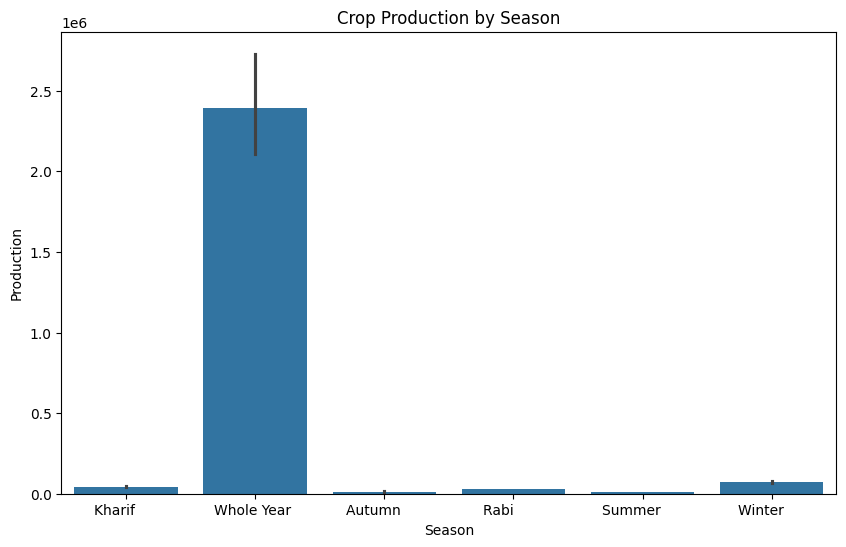

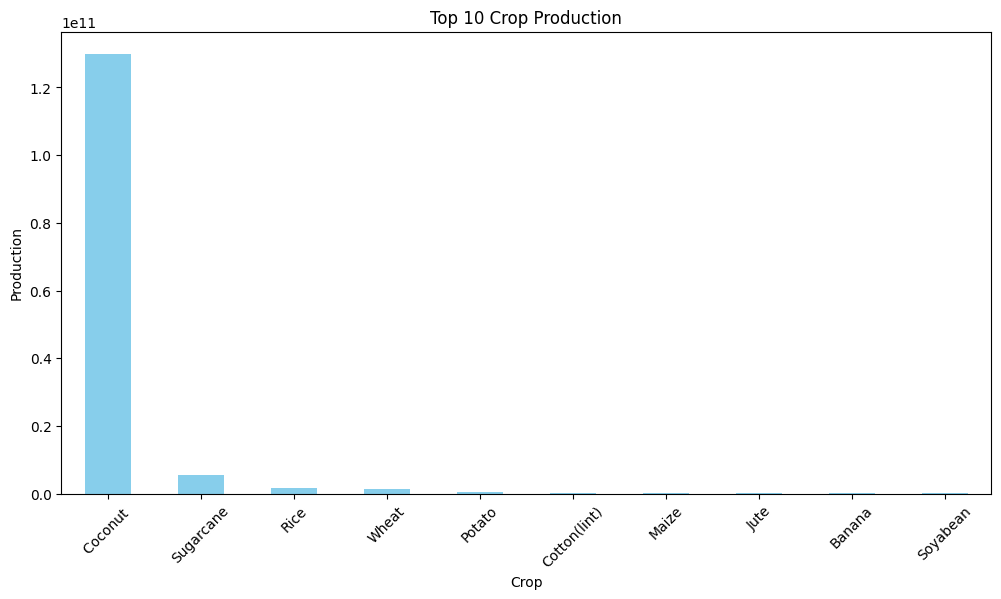

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize crop production trends over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Crop_Year', y='Production', data=data)
plt.title('Crop Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()

# Visualize crop production by season
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Production', data=data)
plt.title('Crop Production by Season')
plt.xlabel('Season')
plt.ylabel('Production')
plt.show()

# Visualize top crop production by crop
top_crops = data.groupby('Crop')['Production'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_crops.plot(kind='bar', color='skyblue')
plt.title('Top 10 Crop Production')
plt.xlabel('Crop')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.show()


In [ ]:
state_production_count = data['State_Name'].value_counts()
print(state_production_count)


State_Name
Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                    

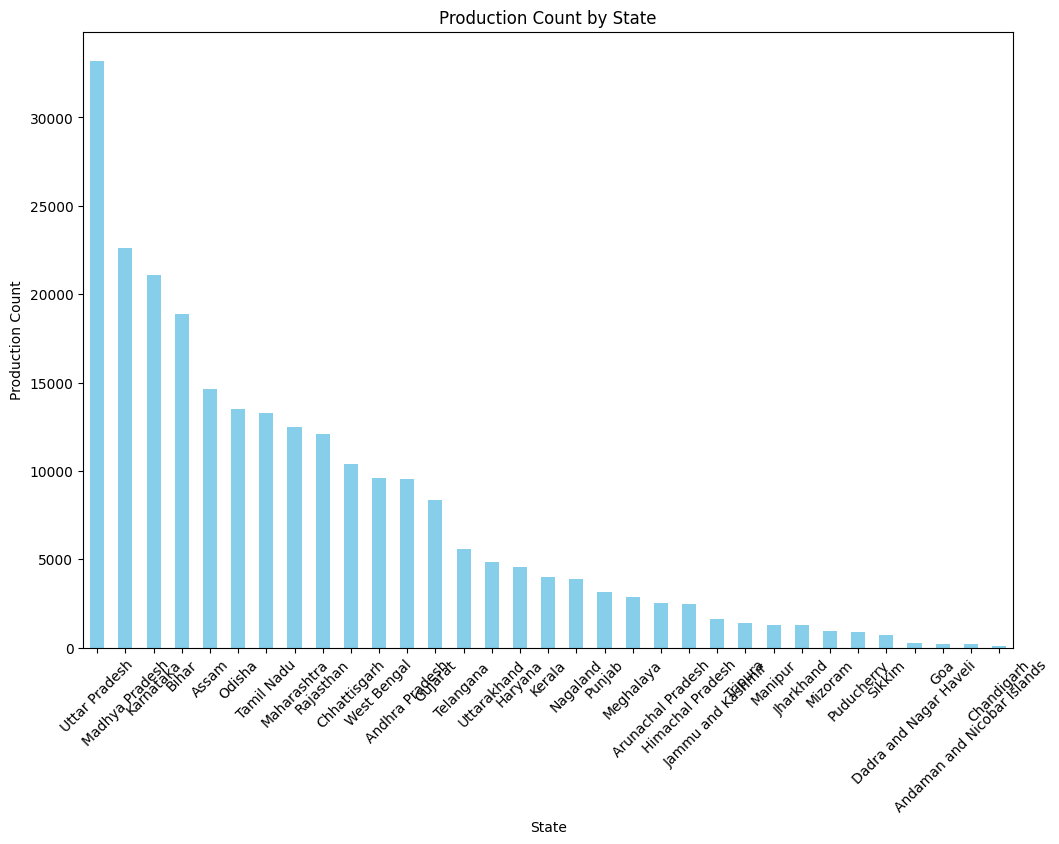

In [ ]:
plt.figure(figsize=(12, 8))
state_production_count.plot(kind='bar', color='skyblue')
plt.title('Production Count by State')
plt.xlabel('State')
plt.ylabel('Production Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
district_production_count = data['District_Name'].value_counts()
print(district_production_count)


District_Name
TUMKUR       931
BELGAUM      924
BIJAPUR      905
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: count, Length: 646, dtype: int64


In [ ]:
top_states_production = data.groupby('State_Name')['Production'].sum().nlargest(3)
print(top_states_production)


State_Name
Kerala            9.788005e+10
Andhra Pradesh    1.732459e+10
Tamil Nadu        1.207644e+10
Name: Production, dtype: float64


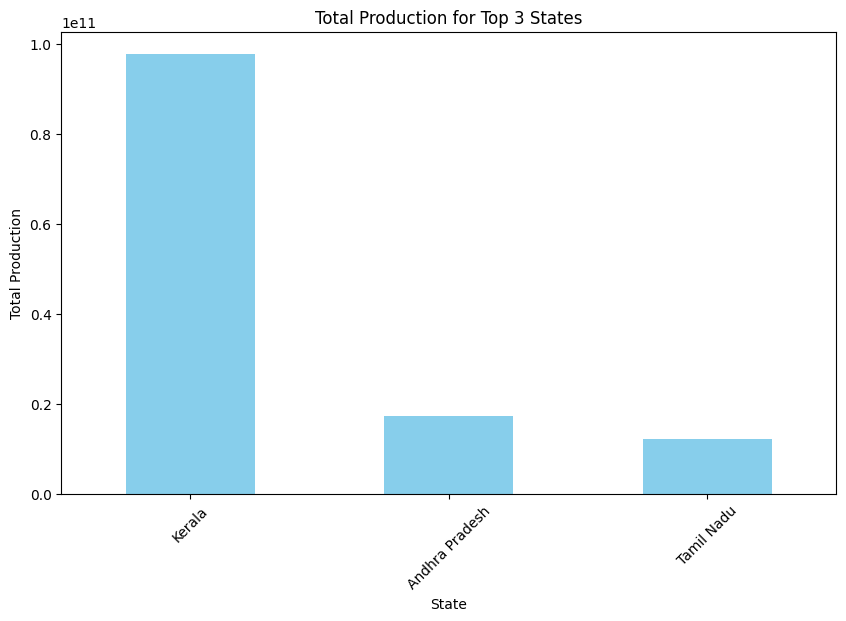

In [ ]:
plt.figure(figsize=(10, 6))
top_states_production.plot(kind='bar', color='skyblue')
plt.title('Total Production for Top 3 States')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=45)
plt.show()


In [ ]:
top_states_crop_area = data.groupby('State_Name')['Area'].sum().nlargest(3)
print(top_states_crop_area)


State_Name
Uttar Pradesh     433622332.0
Madhya Pradesh    329791261.0
Maharashtra       322186037.0
Name: Area, dtype: float64


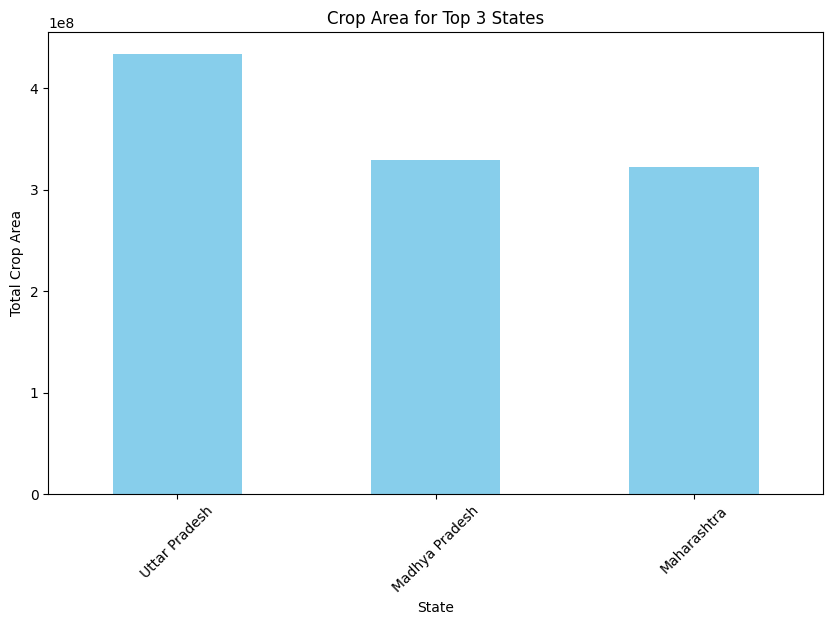

In [ ]:
plt.figure(figsize=(10, 6))
top_states_crop_area.plot(kind='bar', color='skyblue')
plt.title('Crop Area for Top 3 States')
plt.xlabel('State')
plt.ylabel('Total Crop Area')
plt.xticks(rotation=45)
plt.show()


In [ ]:
season_production_sum = data.groupby('Season')['Production'].sum()
season_production_sum

Season
Autumn         6.441377e+07
Kharif         4.029970e+09
Rabi           2.051688e+09
Summer         1.706579e+08
Whole Year     1.344248e+11
Winter         4.345498e+08
Name: Production, dtype: float64

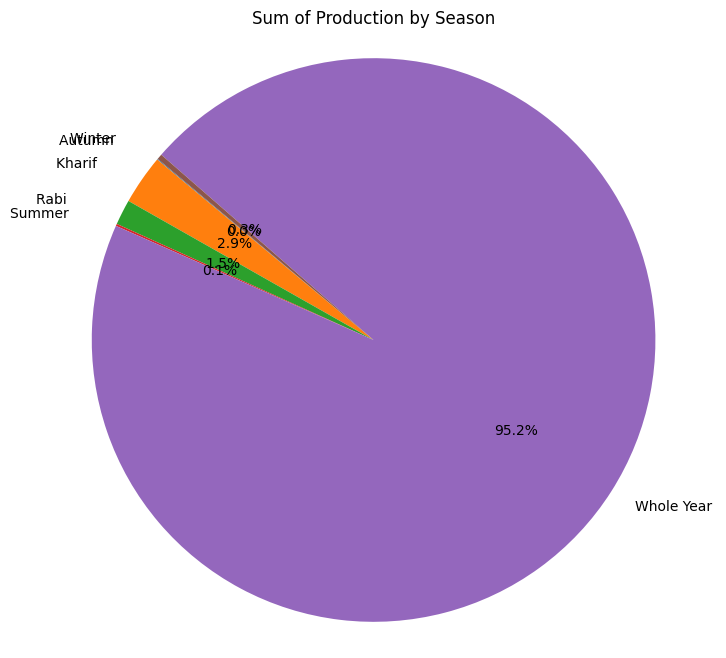

In [ ]:

plt.figure(figsize=(8, 8))
plt.pie(season_production_sum, labels=season_production_sum.index, autopct='%1.1f%%', startangle=140)
plt.title('Sum of Production by Season')
plt.axis('equal')
plt.show()
